In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#Points = np.array(["P1","P2","P3","P4","P5","P6","P7","P8"])

In [43]:
#S1 = np.array([0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3])

In [44]:
#S2 = np.array([0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2])

In [45]:
df = pd.read_csv('IRIS.csv')

In [46]:
no_of_col = df.shape[1]

for i in range(no_of_col):
    if(df[:i].isnull().values.any()):
        print("Col ",i," has null values.")

In [47]:
## No NULL values present

In [48]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [49]:
# Now lets handle the duplicates

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [50]:
# Lets look at the duplicate rows now
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [51]:
# Removing these rows
df.drop_duplicates(keep='first', inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

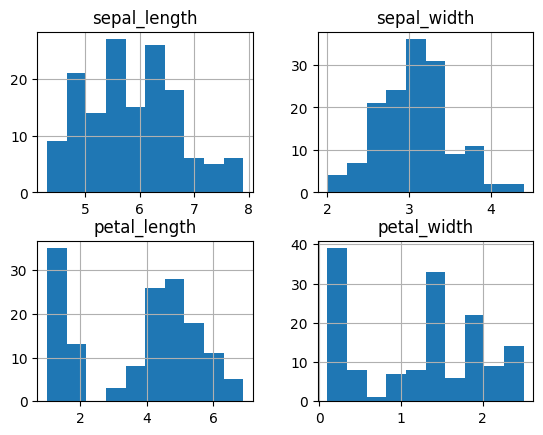

In [52]:
## PLotting histogram

df.hist()

<AxesSubplot:>

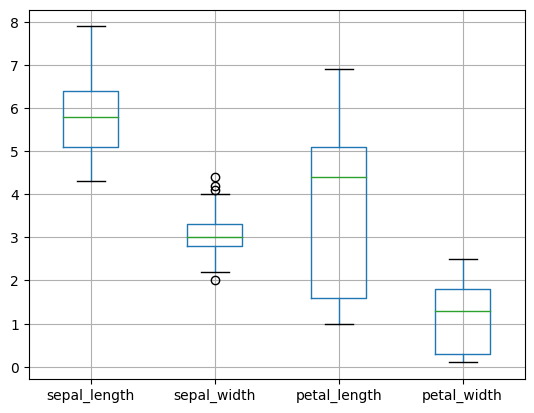

In [53]:
## Plotting boxplot

df.boxplot()

In [54]:
# lets make a general func that removes outliers for a given column
def outlier_remove(col_i):
    ## Lets follow inter quartile range method
    ## return the values of the lower range limit and upper range limit
    ## these limits have values 1.5*(inter quartile range beyond) first and third quartiles.
    
    ## To find quartiles, we must sort the column
    sorted(col_i)
    
    Q1,Q3 = np.percentile(col_i , [25,75]) 
    ## because we are taking quartiles. therefore 25% and 75%
    inter_q_range = Q3-Q1
    
    l_lim = Q1 - (1.5 * inter_q_range)
    up_lim = Q3 + (1.5 * inter_q_range)
    return l_lim,up_lim, Q1,Q3, inter_q_range


    
    

In [55]:
l,u,q1,q3,iqr=outlier_remove(df.sepal_width)
df.drop(df[(df.sepal_width < l) | (df.sepal_width > u)].index,inplace=True)

<AxesSubplot:>

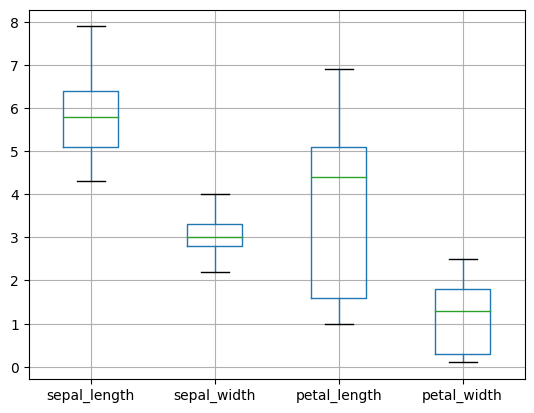

In [56]:
## Plotting boxplot

df.boxplot()

In [57]:
## Outliers removed

In [58]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
from sklearn.preprocessing import MinMaxScaler

MMscaler = MinMaxScaler()
df_ncol= df.select_dtypes(exclude=['object'])
##df_ncol
temp = df

# Scalable columns
cols= df_ncol.columns

## Performing min max scalning
temp[cols]=  MMscaler.fit_transform(df[cols])

In [60]:
temp

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.722222,0.067797,0.041667,Iris-setosa
1,0.166667,0.444444,0.067797,0.041667,Iris-setosa
2,0.111111,0.555556,0.050847,0.041667,Iris-setosa
3,0.083333,0.500000,0.084746,0.041667,Iris-setosa
4,0.194444,0.777778,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667,Iris-virginica
146,0.555556,0.166667,0.677966,0.750000,Iris-virginica
147,0.611111,0.444444,0.711864,0.791667,Iris-virginica
148,0.527778,0.666667,0.745763,0.916667,Iris-virginica
